In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
import keras.metrics
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
#import torch
#import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.applications.resnet import ResNet50
from keras.models import Model
import keras

In [10]:

trainVGG = ImageDataGenerator(rescale=1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
testVGG = ImageDataGenerator(rescale = 1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
validationVGG = ImageDataGenerator(rescale = 1./255)

In [11]:
IMAGE_SIZE_VGG = (150, 150)
NUM_EPOCHS_VGG = 50
BATCH_SIZE_VGG = 32
LEARNING_RATE_VGG = 0.001
DROP_OUT_VGG = 0.3


train_dataset_VGG = trainVGG.flow_from_directory('dataset/Train/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset_VGG = trainVGG.flow_from_directory('dataset/Test/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset_VGG = trainVGG.flow_from_directory('dataset/Validation/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [12]:
validation_dataset_VGG.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2, 'tuberculosis': 3}

In [13]:
STEP_SIZE_TRAIN_VGG=len(train_dataset_VGG)
STEP_SIZE_VALID_VGG=len(validation_dataset_VGG)

In [14]:
conv_base_VGG = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base_VGG.trainable = False

model_VGG = models.Sequential()
model_VGG.add(conv_base_VGG)
model_VGG.add(layers.Flatten())
model_VGG.add(layers.Dense(128, activation='relu'))
model_VGG.add(Dropout(DROP_OUT_VGG))
model_VGG.add(layers.Dense(4, activation='softmax'))
model_VGG.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=LEARNING_RATE_VGG), metrics=['acc'])
model_VGG.save('Xception.model')

INFO:tensorflow:Assets written to: Xception.model\assets


C:\Users\Hp\AppData\Roaming\Python\Python36\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [15]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [16]:
print(model_VGG.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6553728   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 27,415,724
Trainable params: 6,554,244
Non-trainable params: 20,861,480
_________________________________________________________________
None


In [17]:
from keras.callbacks import CSVLogger
csv_VGG19 = CSVLogger('trainingXception.log', separator=',', append=False)

history_VGG=model_VGG.fit(train_dataset_VGG,
 steps_per_epoch =STEP_SIZE_TRAIN_VGG,
 validation_data = validation_dataset_VGG,
 validation_steps = STEP_SIZE_VALID_VGG,
 epochs= NUM_EPOCHS_VGG,
 callbacks=[early_stop]
 )

Epoch 1/50
100/100 [==============================] - 164s 2s/step - loss: 9.6003 - acc: 0.5091 - val_loss: 1.3590 - val_acc: 0.6394
Epoch 2/50
100/100 [==============================] - 164s 2s/step - loss: 1.4665 - acc: 0.5678 - val_loss: 0.7110 - val_acc: 0.6250
Epoch 3/50
100/100 [==============================] - 166s 2s/step - loss: 1.1228 - acc: 0.5800 - val_loss: 0.8729 - val_acc: 0.6087
Epoch 4/50
100/100 [==============================] - 163s 2s/step - loss: 0.9532 - acc: 0.6478 - val_loss: 0.6093 - val_acc: 0.7650
Epoch 5/50
100/100 [==============================] - 164s 2s/step - loss: 0.8254 - acc: 0.7050 - val_loss: 0.6313 - val_acc: 0.7163
Epoch 6/50
100/100 [==============================] - 162s 2s/step - loss: 0.7171 - acc: 0.7225 - val_loss: 0.4977 - val_acc: 0.7556
Epoch 7/50
100/100 [==============================] - 162s 2s/step - loss: 0.7550 - acc: 0.7378 - val_loss: 0.3845 - val_acc: 0.8256
Epoch 8/50
100/100 [==============================] - 165s 2s/step - 

In [18]:
model_VGG.evaluate(test_dataset_VGG)

25/25 [==============================] - 27s 1s/step - loss: 0.6969 - acc: 0.8888


[0.69694983959198, 0.8887500166893005]

In [19]:
predictions_VGG = model_VGG.predict(x=test_dataset_VGG, verbose=0)

In [20]:
rounded_predictions_VGG = np.argmax(predictions_VGG, axis=-1)

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
cm_VGG = confusion_matrix(y_true=test_dataset_VGG.classes, y_pred=rounded_predictions_VGG)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[163  33   1   3]
 [ 19 174   0   7]
 [  6   1 192   1]
 [ 13   7   1 179]]


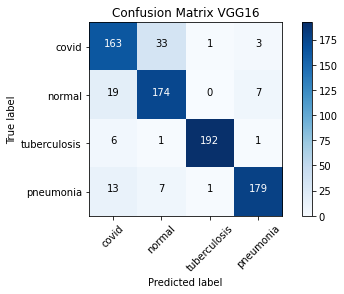

In [24]:
cm_plot_labels = ['covid', 'normal','tuberculosis', 'pneumonia']
plot_confusion_matrix(cm=cm_VGG, classes=cm_plot_labels, title='Confusion Matrix VGG16')

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [26]:
labels = ['covid', 'normal','tuberculosis', 'pneumonia']
report_VGG = classification_report(test_dataset_VGG.classes, rounded_predictions_VGG, target_names=labels)
print(report_VGG)


              precision    recall  f1-score   support

       covid       0.81      0.81      0.81       200
      normal       0.81      0.87      0.84       200
tuberculosis       0.99      0.96      0.97       200
   pneumonia       0.94      0.90      0.92       200

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



In [27]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    plt.show()

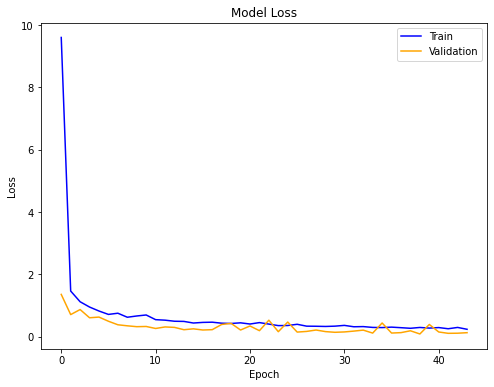

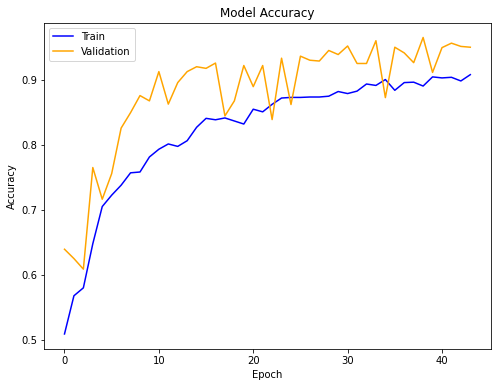

In [28]:
plot_loss_acc(history_VGG)